# Data Assignment

## Introduction

In this assignment you will learn to apply confidence intervals in real world examples.

## Dataset

According to Wikipedia San Diego has one of the best climates in the United states, enjoying consistent and mild weather year round. We will use the hourly weather dataset to consider temperature changes in the city.
https://www.kaggle.com/selfishgene/historical-hourly-weather-data/data

## Some useful functions

The following functions, outlined in the SciPy library may prove helpful.

**scipy.stats.norm.ppf()** → Returns the percent point function for the normal distribution <br>
**scipy.stats.t.ppf()** → Returns the percent point function for the student's t distribution

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm, t, sem, bayes_mvs
%matplotlib inline
%config InlineBackend.figure_format ='retina'

In [2]:
weather = pd.read_csv('temperature.csv', sep=',')

In [3]:
weather = weather.drop(columns=[("Vancouver")])
weather = weather.drop(columns=[("Portland")])
weather = weather.drop(columns=[("San Francisco")])
weather = weather.drop(columns=[("Seattle")])
weather = weather.drop(columns=[("Los Angeles")])
weather = weather.drop(columns=[("Las Vegas")])
weather = weather.drop(columns=[("Phoenix")])
weather = weather.drop(columns=[("Albuquerque")])
weather = weather.drop(columns=[("Denver")])
weather = weather.drop(columns=[("San Antonio")])
weather = weather.drop(columns=[("Dallas")])
weather = weather.drop(columns=[("Houston")])
weather = weather.drop(columns=[("Kansas City")])
weather = weather.drop(columns=[("Minneapolis")])
weather = weather.drop(columns=[("Saint Louis")])
weather = weather.drop(columns=[("Chicago")])
weather = weather.drop(columns=[("Nashville")])
weather = weather.drop(columns=[("Indianapolis")])
weather = weather.drop(columns=[("Jacksonville")])
weather = weather.drop(columns=[("Charlotte")])
weather = weather.drop(columns=[("Miami")])
weather = weather.drop(columns=[("Pittsburgh")])
weather = weather.drop(columns=[("Toronto")])
weather = weather.drop(columns=[("Philadelphia")])
weather = weather.drop(columns=[("New York")])
weather = weather.drop(columns=[("Montreal")])
weather = weather.drop(columns=[("Boston")])
weather = weather.drop(columns=[("Beersheba")])
weather = weather.drop(columns=[("Tel Aviv District")])
weather = weather.drop(columns=[("Eilat")])
weather = weather.drop(columns=[("Haifa")])
weather = weather.drop(columns=[("Nahariyya")])
weather = weather.drop(columns=[("Jerusalem")])
weather = weather.drop(columns=[("Atlanta")])
weather = weather.drop(columns=[("Detroit")])

## Q1

If you plot a histogram with 100 bins using all the samples, which one would represesnt San Diego

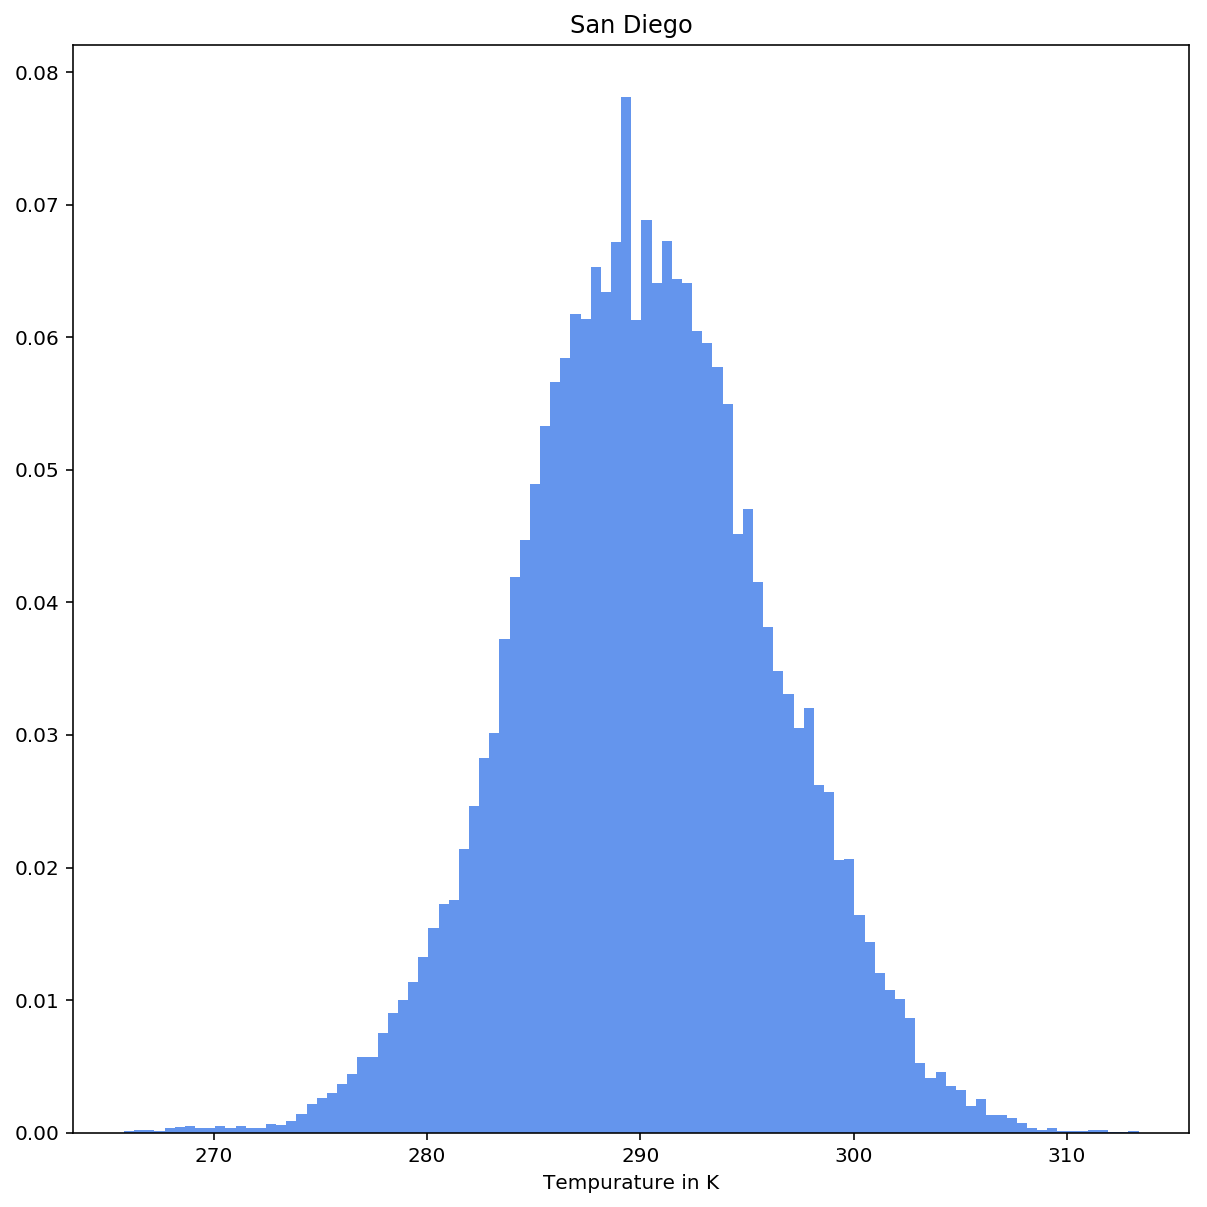

In [21]:
num_bins = 100
x = weather['San Diego']

fig, ax = plt.subplots(figsize=(10, 10))

# the histogram of the data
n, bins, patches = ax.hist(x, num_bins, density=True, color='cornflowerblue')


ax.set_xlabel('Tempurature in K')
ax.set_ylabel('')
ax.set_title('San Diego')

plt.show()

## Q2 

The sample mean and variance over the data's duration

In [5]:
n = weather['San Diego'].count()
n

45252

In [6]:
mu = np.mean(weather[['San Diego']])
var = np.var(weather[['San Diego']])

print("The Mean of the Entire Sample Is = ", mu)
print("The Raw Variance of the Sample ('S^2') Is = ", var)

The Mean of the Entire Sample Is =  San Diego    290.215044
dtype: float64
The Raw Variance of the Sample ('S^2') Is =  San Diego    34.691241
dtype: float64


## Q3

The sample mean in February 2013

In [7]:
feb_before = weather['datetime'] > '2013-02-01 00:00:00'
feb_after = weather['datetime'] < '2013-03-01 00:00:00'

In [8]:
feb_data = weather[feb_before]

In [9]:
feb_after = feb_data['datetime'] < '2013-03-01 00:00:00'

In [10]:
feb_data = feb_data[feb_after]

In [11]:
n = feb_data['San Diego'].count()
n

671

In [12]:
feb_mu = np.mean(feb_data[['San Diego']]) # calculate the mean

print("The Sample Mean in Feb 2013 = ", feb_mu)

The Sample Mean in Feb 2013 =  San Diego    285.24012
dtype: float64


# Q4

The 90% confidence interval for February 2013 using the z-statistic, assuming the variance you calculated in Q2

In [13]:
z_bounds = t.interval(0.90, len(feb_data[['San Diego']])-1, loc=np.mean(feb_data[['San Diego']]), scale=sem(feb_data[['San Diego']]))

In [14]:
print('Upper Bounds = ', z_bounds[1])

Upper Bounds =  [285.49312977]


In [15]:
print('Lower Bounds = ', z_bounds[0])

Lower Bounds =  [284.98711012]


In [16]:
# Another way to calcuate the same thing as above
mean, var, std = bayes_mvs(feb_data[['San Diego']])
print(mean)

Mean(statistic=285.2401199453562, minmax=(284.9871101211008, 285.4931297696116))


# Q5

The 90% confidence interval for February 2013 using the t-statistic

In [17]:
t_bounds = t.interval(0.90, len(feb_data[['San Diego']])-1, loc=np.mean(feb_data[['San Diego']]), scale=sem(feb_data[['San Diego']]))

In [18]:
print('Upper Bounds = ', t_bounds[1])

Upper Bounds =  [285.49312977]


In [19]:
print('Lower Bounds = ', t_bounds[0])

Lower Bounds =  [284.98711012]


In [20]:
norm.ppf(.95)

1.6448536269514722